# Harry Potter project - group 4


Welcome to our harry potter project notebook. In this notebook you can find how we train the bow based model 
using training data from the 8 characters that speak the most in the first 3 movies. We collected the lines from these 8 characters and preprocessed the lines and turned them into a bag of words vector. We test the classifier using strings containing multiple processed lines from each character. You can then see how we tried three different classifiers, and as you can see, there is a clear difference which performs the best. Namely the Linear Support Vector Classification. We also created such a classifier for the houses.

Furthermore we use another dataset containing the characters and the corresponding house of the characters. Using this information we can extract which lines said by the character belong to which house. With this information we create wordclouds for each house. This is a useful way to see how the different houses talk about different topics. 

Then we managed to make a Twitter API which we can use to extract tweets from every user. We transform these tweets from a user to a bag of words vector and input that to the classifier. Using predict_proba we can see for each class the probability of belonging to this class. 

At last we created a application prototype where we combine all these different things with eachother. 

Have fun - group 4 (Lotte Hurkens, Nina Groot and Dewi Spooren)

In [1]:
import pandas as pd
import numpy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import math
np.random.seed(2018)

lemmatizer = WordNetLemmatizer()

# Training the bow based model for characters

In [2]:
script_1 = pd.read_csv("HarryPotter1.csv", sep=';', encoding="ISO-8859-1")
script_2 = pd.read_csv("HarryPotter2.csv", sep=';', encoding="ISO-8859-1")
script_3 = pd.read_csv("HarryPotter3.csv", sep=';', encoding="ISO-8859-1")
script_3 = script_3.rename(columns={'CHARACTER': 'Character', 'SENTENCE': 'Sentence'})

In [3]:
step1 = pd.concat([script_1, script_2])
all_scripts = pd.concat([step1, script_3])

In [4]:
all_scripts['Character'] = all_scripts['Character'].str.strip()
all_scripts['Character'] = all_scripts['Character'].str.upper()
script_all_count = all_scripts['Character'].value_counts()

main_characters = script_all_count[:8]
character_list = main_characters.index.to_list()

In [5]:
main_characters

HARRY         1028
RON            536
HERMIONE       485
HAGRID         394
DUMBLEDORE     239
LUPIN          207
MCGONAGALL     152
SNAPE          121
Name: Character, dtype: int64

In [6]:
final_script = all_scripts[all_scripts['Character'].isin(character_list)]

def lemmatize_stemming(text):
    return lemmatizer.lemmatize(text)

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

final_script['preprocessed'] = final_script.apply(lambda row: preprocess(row.Sentence), axis = 1)
final_script['preprocessed'] = [','.join(map(str, l)) for l in final_script['preprocessed']]

/Users/dewispooren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/dewispooren/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
from sklearn.model_selection import train_test_split
y = final_script['Character'].to_list()
x = final_script['preprocessed'].to_list()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [8]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

In [9]:
#Put multiple lines together for each character and use that as test data
#Only the preprocessed lines are not enough to use for classifying
test_harry = []
test_ron = []
test_hermione = []
test_hagrid = []
test_dumbledore = []
test_lupin = []
test_mcgonagall = []
test_snape = []

for i in range(633):
    if y_test[i] == 'HARRY': 
        test_harry.append(x_test[i])
    if y_test[i] == 'RON': 
        test_ron.append(x_test[i])
    if y_test[i] == 'HERMIONE': 
        test_hermione.append(x_test[i])
    if y_test[i] == 'HAGRID': 
        test_hagrid.append(x_test[i])
    if y_test[i] == 'DUMBLEDORE': 
        test_dumbledore.append(x_test[i])
    if y_test[i] == 'LUPIN': 
        test_lupin.append(x_test[i])
    if y_test[i] == 'MCGONAGALL': 
        test_mcgonagall.append(x_test[i])
    if y_test[i] == 'SNAPE': 
        test_snape.append(x_test[i])  

x_test = []
y_test = []
def make_test_data(test_name, name, number):
    chunk_name = chunkIt((test_name), number)
    for chunk in chunk_name:
        x_test.append(' '.join(chunk))
    for i in range(len(chunk_name)):
        y_test.append(name)

make_test_data(test_harry, 'HARRY', 5)
make_test_data(test_ron, 'RON', 4)
make_test_data(test_hermione, 'HERMIONE', 4)
make_test_data(test_hagrid, 'HAGRID', 4)
make_test_data(test_dumbledore, 'DUMBLEDORE', 3)
make_test_data(test_lupin, 'LUPIN', 2)
make_test_data(test_mcgonagall, 'MCGONAGALL', 2)
make_test_data(test_snape, 'SNAPE', 2)




In [10]:
from sklearn.feature_extraction.text import CountVectorizer
text = x_train
vectorizer = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize)
vectorizer.fit(text)

vector_x_train = vectorizer.transform(text)

text2 = x_test
y_test = y_test
vector_x_test = vectorizer.transform(text2)

/Users/dewispooren/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [11]:
from sklearn import svm
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

svm2 = svm.LinearSVC()
clf = CalibratedClassifierCV(svm2) 
clf.fit(vector_x_train, y_train)
#print(clf.score(vector_x_test, y_test))

lin_classifier = svm.LinearSVC()
lin_classifier.fit(vector_x_train, y_train)
print(lin_classifier.score(vector_x_test, y_test))

prediction = lin_classifier.predict(vector_x_test)
print(metrics.classification_report(y_test, prediction))
print(prediction)

0.8461538461538461
              precision    recall  f1-score   support

  DUMBLEDORE       0.60      1.00      0.75         3
      HAGRID       1.00      1.00      1.00         4
       HARRY       1.00      1.00      1.00         5
    HERMIONE       0.67      1.00      0.80         4
       LUPIN       1.00      1.00      1.00         2
  MCGONAGALL       1.00      0.50      0.67         2
         RON       1.00      0.50      0.67         4
       SNAPE       1.00      0.50      0.67         2

    accuracy                           0.85        26
   macro avg       0.91      0.81      0.82        26
weighted avg       0.90      0.85      0.84        26

['HARRY' 'HARRY' 'HARRY' 'HARRY' 'HARRY' 'RON' 'HERMIONE' 'HERMIONE' 'RON'
 'HERMIONE' 'HERMIONE' 'HERMIONE' 'HERMIONE' 'HAGRID' 'HAGRID' 'HAGRID'
 'HAGRID' 'DUMBLEDORE' 'DUMBLEDORE' 'DUMBLEDORE' 'LUPIN' 'LUPIN'
 'DUMBLEDORE' 'MCGONAGALL' 'SNAPE' 'DUMBLEDORE']


In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg.fit(vector_x_train, y_train)
logreg.score(vector_x_test, y_test)


0.6153846153846154

In [13]:
from sklearn.naive_bayes import MultinomialNB
multinb = MultinomialNB()
multinb.fit(vector_x_train, y_train)
multinb.score(vector_x_test, y_test)

0.46153846153846156

# House classification

In [14]:
characters = pd.read_csv("Characters.csv", sep=';', encoding="ISO-8859-1")


In [15]:
#Get all characters in a list instead of only the top 8
main_characters = script_all_count
character_list = main_characters.index.to_list()

In [16]:
#Get the name of the character list and the full name from the character database
full_names = []
for character in character_list:
    for row in characters["Name"].values:
        if character.lower() in row.lower():
            full_names.append((character,row))

#Sometimes the check did not go well
#Because if we check for example 'RON', we also get bloody baron, because the word ron is in baron. 
#With the following for loop we checked each name and deleted the names from the list that did not go well.

#for i in range(len(full_names)):
 #   print(full_names[i], i)

In [17]:
wrong_name = (('RON', 'Bloody Baron'), ('DUMBLEDORE', 'Aberforth Dumbledore'), ('MALFOY', 'Narcissa Malfoy'),
             ('LUPIN', 'Edward Remus Lupin'), ('SIRIUS', 'James Sirius Potter'), ('MALFOY', 'Scorpius Hyperion Malfoy'),
             ('MALFOY', 'Lucius Malfoy'), ('WOOD', 'Augustus Rookwood'), ('MAN', 'Newton Scamander'), ('TOM', 'Neville Longbottom'),
             ('TOM', 'Alice Longbottom'), ('TOM', 'Frank Longbottom'), ('ALL', 'Minerva McGonagall'))

for i in wrong_name:
    full_names.remove(i)

In [18]:
#Sometimes the names are not completely alike, therefore we have to manually append some names.
characters_not_missed = []
for character in character_list:
    for full_name in full_names:
        if character in full_name:
            characters_not_missed.append(character)

#using the for loop below we can see which characters we are missing and therefore have to manually append to the list

#for character in character_list:
    #if character not in characters_not_missed:
        #print(character)
        
missed_characters = [('MRS. WEASLEY', 'Molly Weasley'), ('MR. WEASLEY', 'Arthur Weasley'), 
                     ('PROFESSOR SPROUT', 'Pomona Sprout'),
                     ('SIR NICHOLAS', 'Nicholas de Mimsy-Porpington') ]
full_names = full_names + missed_characters


In [19]:
#Get the name with the house he/she belongs to
names_with_houses = []
for character in full_names:
    for row in characters.values:
        if character[1] in row[1]:
            names_with_houses.append((character[0],row[4]))

#We checked and for two names this went wrong, so we fix this manually.
indexes = [45, 48]
for index in sorted(indexes, reverse=True):
    del names_with_houses[index]

In [20]:
#Add column 'house' to database 
def house_assign(row):
    for name in names_with_houses:
        if row in name[0]:
            return(name[1])


all_scripts['houses'] = all_scripts['Character'].apply(lambda row: house_assign(row))
all_scripts['houses'] = all_scripts['houses'].fillna('not sorted')
print(all_scripts.head())

    Character                                           Sentence      houses
0  DUMBLEDORE  I should've known that you would be here, Prof...  Gryffindor
1  MCGONAGALL                Good evening, Professor Dumbledore.  Gryffindor
2  MCGONAGALL                        Are the rumors true, Albus?  Gryffindor
3  DUMBLEDORE                          I'm afraid so, professor.  Gryffindor
4  DUMBLEDORE                              The good and the bad.  Gryffindor


In [21]:
all_scripts['preprocessed'] = all_scripts.apply(lambda row: preprocess(row.Sentence), axis = 1)
all_scripts['preprocessed'] = [','.join(map(str, l)) for l in all_scripts['preprocessed']]

In [22]:
indexNames = all_scripts[all_scripts['houses'] == 'not sorted'].index

# Delete these row indexes from dataFrame
all_scripts.drop(indexNames , inplace=True)

In [23]:
from sklearn.model_selection import train_test_split
y2 = all_scripts['houses'].to_list()
x2 = all_scripts['preprocessed'].to_list()

x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2)

In [24]:
#Put multiple lines together for each house and use that as test data
#Only the preprocessed lines are not enough to use for classifying
test_gryffindor = []
test_hufflepuf = []
test_slytherin = []
test_ravenclaw = []

yes = []
no = []

for i in range(len(y_test2)):
    if y_test2[i] == 'Gryffindor': 
        yes.append(y_test2[i])
        test_gryffindor.append(x_test2[i])
    elif y_test2[i] == 'Hufflepuff': 
        test_hufflepuf.append(x_test2[i])
        yes.append(y_test2[i])
    elif y_test2[i] == 'Slytherin': 
        test_slytherin.append(x_test2[i])
        yes.append(y_test2[i])
    elif y_test2[i] == 'Ravenclaw': 
        test_ravenclaw.append(x_test2[i])
        yes.append(y_test2[i])
    else:
        no.append(y_test2[i])

x_test2 = []
y_test2 = []
def make_test_data(test_name, name, number):
    chunk_name = chunkIt((test_name), number)
    for chunk in chunk_name:
        x_test2.append(' '.join(chunk))
    for i in range(len(chunk_name)):
        y_test2.append(name)

make_test_data(test_slytherin, 'Slytherin', 3)
make_test_data(test_gryffindor, 'Gryffindor', 15)
make_test_data(test_hufflepuf, 'Hufflepuff', 1)
make_test_data(test_ravenclaw, 'Ravenclaw', 2)




In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer2 = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize)
vectorizer2.fit(x_train2)

vector_x_train2 = vectorizer2.transform(x_train2)

vector_x_test2 = vectorizer2.transform(x_test2)

/Users/dewispooren/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [26]:
from sklearn import svm
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

lin_classifier2 = svm.LinearSVC()
lin_classifier2.fit(vector_x_train2, y_train2)
print(lin_classifier2.score(vector_x_test2, y_test2))

prediction2 = lin_classifier2.predict(vector_x_test2)
print((metrics.classification_report(y_test2, prediction2)))


0.8095238095238095
              precision    recall  f1-score   support

  Gryffindor       0.87      0.87      0.87        15
  Hufflepuff       0.00      0.00      0.00         1
   Ravenclaw       0.50      0.50      0.50         2
   Slytherin       0.75      1.00      0.86         3

    accuracy                           0.81        21
   macro avg       0.53      0.59      0.56        21
weighted avg       0.77      0.81      0.79        21



/Users/dewispooren/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg2.fit(vector_x_train2, y_train2)
print(logreg2.score(vector_x_test2, y_test2))

prediction2 = logreg2.predict(vector_x_test2)
print((metrics.classification_report(y_test2, prediction2)))


0.8571428571428571
              precision    recall  f1-score   support

  Gryffindor       0.88      0.93      0.90        15
  Hufflepuff       0.00      0.00      0.00         1
   Ravenclaw       1.00      0.50      0.67         2
   Slytherin       0.75      1.00      0.86         3

    accuracy                           0.86        21
   macro avg       0.66      0.61      0.61        21
weighted avg       0.83      0.86      0.83        21



/Users/dewispooren/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.naive_bayes import MultinomialNB
multinb = MultinomialNB()
multinb.fit(vector_x_train2, y_train2)
multinb.score(vector_x_test2, y_test2)

0.7142857142857143

# Word Clouds

In [29]:
#pip install wordcloud
characters = (all_scripts.Character.unique())

In [30]:
gryffindor = []
for house in names_with_houses:
    if house[1] == "Gryffindor":
        gryffindor.append(house[0].upper())
print(gryffindor)

['HARRY', 'RON', 'HERMIONE', 'HAGRID', 'DUMBLEDORE', 'LUPIN', 'MCGONAGALL', 'SIRIUS', 'PERCY', 'FRED', 'NEVILLE', 'GEORGE', 'SEAMUS', 'OLIVER', 'PETTIGREW', 'LEE JORDAN', 'WOOD', 'GINNY', 'DEAN', 'COLIN', 'PARVATI', 'MRS. WEASLEY', 'MRS. WEASLEY', 'MR. WEASLEY', 'SIR NICHOLAS']


In [31]:
all_scripts_gryffindor = []
counter = 0
for i in all_scripts["Character"]:
    if i in gryffindor:
        all_scripts_gryffindor.append(all_scripts['preprocessed'].values[counter])
        counter +=1
    else:
        counter +=1

wordcloud Gryffindor:


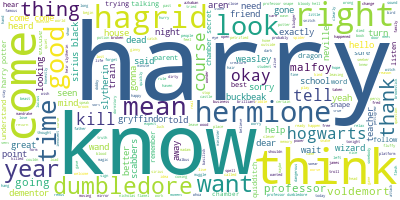

In [32]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
all_scripts_gryffindor = ','.join(list(all_scripts_gryffindor))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='darkorange')
# Generate a word cloud
wordcloud.generate(all_scripts_gryffindor)
# Visualize the word cloud
print("wordcloud Gryffindor:")
wordcloud.to_image()

In [33]:
slytherin = []
for house in names_with_houses:
    if house[1] == "Slytherin":
        slytherin.append(house[0].upper())
print(slytherin)

['SNAPE', 'DRACO', 'LUCIUS MALFOY', 'MALFOY', 'FLINT', 'GOYLE', 'TOM', 'CRABBE']


In [34]:
all_scripts_slytherin = []
counter = 0
for i in all_scripts["Character"]:
    if i in slytherin:
        all_scripts_slytherin.append(all_scripts['preprocessed'].values[counter])
        counter +=1
    else:
        counter +=1

wordcloud slytherin:


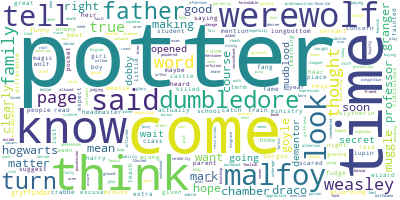

In [35]:
all_scripts_slytherin = ','.join(list(all_scripts_slytherin))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(all_scripts_slytherin)
# Visualize the word cloud
print("wordcloud slytherin:")
wordcloud.to_image()

In [36]:
hufflepuff = []
for house in names_with_houses:
    if house[1] == "Hufflepuff":
        hufflepuff.append(house[0].upper())
print(hufflepuff)

['JUSTIN FINCH-FLETCHLEY', 'PROFESSOR SPROUT']


In [37]:
all_scripts_hufflepuff = []
counter = 0
for i in all_scripts["Character"]:
    if i in hufflepuff:
        all_scripts_hufflepuff.append(all_scripts['preprocessed'].values[counter])
        counter +=1
    else:
        counter +=1

wordcloud hufflepuff:


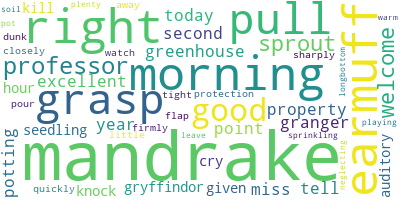

In [38]:
all_scripts_hufflepuff = ','.join(list(all_scripts_hufflepuff))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(all_scripts_hufflepuff)
# Visualize the word cloud
print("wordcloud hufflepuff:")
wordcloud.to_image()

In [39]:
ravenclaw = []
for house in names_with_houses:
    if house[1] == "Ravenclaw":
        ravenclaw.append(house[0].upper())
print(ravenclaw)

['GILDEROY LOCKHART', 'TRELAWNEY', 'QUIRRELL', 'MOANING MYRTLE', 'OLLIVANDER', 'FLITWICK', 'LOCKHART', 'PENELOPE CLEARWATER']


In [40]:
all_scripts_ravenclaw = []
counter = 0
for i in all_scripts["Character"]:
    if i in ravenclaw:
        all_scripts_ravenclaw.append(all_scripts['preprocessed'].values[counter])
        counter +=1
    else:
        counter +=1


wordcloud ravenclaw:


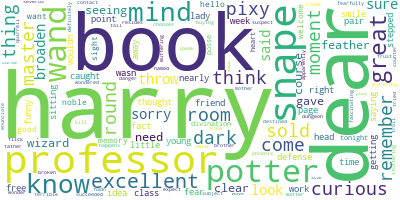

In [41]:
all_scripts_ravenclaw = ','.join(list(all_scripts_ravenclaw))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(all_scripts_ravenclaw)
# Visualize the word cloud
print("wordcloud ravenclaw:")
wordcloud.to_image()

In [42]:
#General function to get all the lines of a house
def generate_script(name_of_house):
    house = []
    for h in names_with_houses:
        if h[1] == name_of_house:
            house.append(h[0].upper())
    all_scripts_house = []
    counter = 0
    for i in all_scripts["Character"]:
        if i in house:
            all_scripts_house.append(all_scripts['preprocessed'].values[counter])
            counter +=1
        else:
            counter +=1
            
    return all_scripts_house

# Get tweets using twitter API

In [43]:
import os
import tweepy as tweepy
import pandas as pd


In [44]:
consumer_key='xFkjy51bfHKumW2VROAOG9Fyk'
consumer_secret='EyjJLudqpRvgZod6sVx8mXNE9y3QLfYihVxzOKoaYYN6kKeffN'
access_token_key='1364492577957965825-9ySXXDszD9NK9P5z23KztXCgPPCtP8'
access_token_secret='uU8EXgmhXu1mcXuOKpJDoyh8QnNSCxWi7UuIdusYBZywE'

In [45]:
import twitter
api = twitter.Api(consumer_key=consumer_key,
                      consumer_secret=consumer_secret,
                      access_token_key=access_token_key,
                      access_token_secret=access_token_secret)

In [46]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth)

In [47]:
def get_tweets(username, max_tweets):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token_key, access_token_secret)

    api = tweepy.API(auth)
    tweets = []
    for tweet in tweepy.Cursor(api.user_timeline,id=username).items(max_tweets):
        tweets.append(tweet.text)
    return tweets


def get_vector_tweets(tweets):  
    cleaned_tweets = [preprocess(tweet) for tweet in tweets]
    test_data_user = []
    for tweet in cleaned_tweets:
        for word in tweet:
            test_data_user.append(word)
    test_data_user = [' '.join(test_data_user)]
    vector_x_test1 = vectorizer.transform(test_data_user)
    vector_x_test2 = vectorizer2.transform(test_data_user)
    return vector_x_test1, vector_x_test2

def print_probs(probs):
    dictionary = {}
    for i in range(len(probs[0])):
        #print(probs[0][i], clf.classes_[i])
        dictionary[clf.classes_[i]] = probs[0][i]
    sorted_dic = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)

    print('First place: ', sorted_dic[0][0], 'With a probability: ', round(sorted_dic[0][1], 2))
    print('Second place: ', sorted_dic[1][0], 'With a probability: ', round(sorted_dic[1][1], 2))
    print('Third place: ', sorted_dic[2][0], 'With a probability: ',round(sorted_dic[2][1], 2))

# Application prototype

Welcome to our application! Would you like to know which of these harry potter characters you represent the most using your tweets? Then you are at the right address! You can be one of these characters:

Dumbledore, Hagrid, Harry, Hermione, Lupin, Mcgonagall, Ron or Snape

In [69]:
max_tweets = 50
username = input("Enter your Twitter username: ")
tweets_for_username = get_tweets(username, max_tweets)
vector_tweets, vector_tweets2 = get_vector_tweets(tweets_for_username)


Enter your Twitter username: justinbieber


In [70]:
proba = clf.predict_proba(vector_tweets)
print("Below you can see your top 3 matches! \n")
print_probs(proba)

Below you can see your top 3 matches! 

First place:  HARRY With a probability:  0.47
Second place:  LUPIN With a probability:  0.46
Third place:  MCGONAGALL With a probability:  0.03


In [71]:
house = logreg2.predict(vector_tweets2)
print("And you belong to: ", house[0])

And you belong to:  Ravenclaw


In the wordcloud below you can see the topics that your house Ravenclaw talks about the most


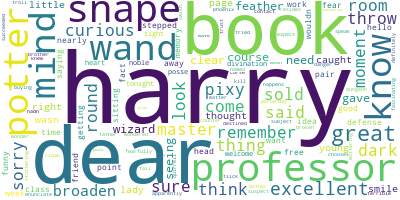

In [72]:
print("In the wordcloud below you can see the topics that your house", house[0], "talks about the most")
all_scripts_house = generate_script(house[0])
all_scripts_house = ','.join(list(all_scripts_house))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(all_scripts_house)
wordcloud.to_image()